In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math
from shapely.geometry import Polygon
from tqdm import tqdm
import scipy.linalg as la

In [135]:
def support(X, val, q): # Set q to be the qth quantile
    return np.quantile((X.T).dot(val), q)

def compute_fb(X, q, n):
    polar_body = np.ones((n,0))
    for i in range(X.shape[1]):
        if support(X, X[:,i] / la.norm(X[:,i]), q) > np.dot(X[:,i], X[:,i]/la.norm(X[:,i])): 
            polar_body = np.hstack((polar_body, np.array(X[:,i]).reshape(n,1)))
    return polar_body

In [68]:
def ret_supp(point, ret_vals):
    
    if point[0] == 0:
        m = 0
    else:
        m = -math.pow(point[1]/point[0],-1)
    #print(m)
    b = point[1] + -m*point[0]
   # print(b)
    #print(f'y = {m}x + {b}')
    x = np.arange(-3,3,.01)
    y = m*x + b
    if ret_vals:
        return m, b
    else:
        return x, y

In [6]:
def ret_int(m1, b1, m2, b2):
    xi = (b1-b2) / (m2-m1)
    yi = m1 * xi + b1

    return xi, yi

[array([ 0.99821279, -0.28767554]), array([-0.95807646,  0.98751608]), array([-0.97807224,  0.31415698]), array([ 0.27029108, -0.97294917])]
[[-5.61663986e+01  5.57783421e+01]
 [ 1.74550649e-02  1.00423937e+00]
 [-5.72899616e+01 -5.57195643e+01]
 [ 1.74550649e-02 -9.77667121e-01]]


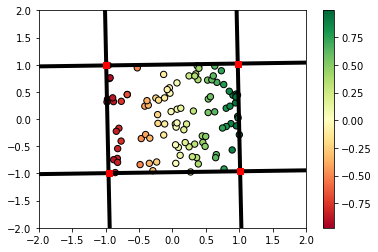

In [108]:
n = 103
error = []
eps = 1
#print(eps)
U_x = np.random.uniform(-1,1,(1,n))
U_y = np.random.uniform(-1,1,(1,n))
U = np.vstack((U_x,U_y))
thetas = [0.02, 90, 180, 270]
thetas = [thetas[i] + eps for i in range(4)]
directions = [[np.cos(np.radians(thetas[i])), np.sin(np.radians(thetas[i]))] for i in range(4)]
colors = np.array([[np.dot(U[:,i], directions[j]) for i in range(n)] for j in range(4)])
scales = [np.dot(U[:,np.argmax(colors[i])], directions[i]) for i in range(4)]
#print(scales)
supports = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], False) for i in range(4)])
#m_b = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], True) for i in range(4)])
m_b = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], True) for i in range(4)])
print([U[:,np.argmax(colors[i])] for i in range(4)])
print(m_b)

points_of_i = []
for i in range(4):
    if i < 3:
        points_of_i.append(ret_int(m_b[i][0], m_b[i][1], m_b[i+1][0], m_b[i+1][1]))
    else:
        points_of_i.append(ret_int(m_b[i][0], m_b[i][1], m_b[0][0], m_b[0][1]))
#print(points_of_i)
pgon = Polygon(points_of_i) # Assuming the OP's x,y coordinates
error.append(pgon.area)

plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(U[0,:], U[1,:], c=colors[0], cmap="RdYlGn", s=40, edgecolors="black");
#plt.plot([0,directions[0][0]*(scales[0]+2)], [0, directions[0][1]*(scales[0]+2)], "k", linewidth=4)

for i in range(4):
    plt.plot(supports[i][0], supports[i][1], "k", linewidth=4)
for i in range(len(points_of_i)):
    plt.plot(points_of_i[i][0],points_of_i[i][1], "rs")
plt.colorbar()
plt.show()


In [144]:
def support_theta(X, val, q): # Set q to be the qth quantile
    return np.quantile(np.dot(X,val), q)

def compute_fb_theta(X, q, n, eps):
    polar_body = np.ones((n,0))
    thetas = [0.02, 90, 180, 270]
    thetas = [thetas[i] + eps for i in range(4)]
    directions = [[np.cos(np.radians(thetas[i])), np.sin(np.radians(thetas[i]))] for i in range(4)]
    for j in range(4):
        for i in range(X.shape[1]):
            if support_theta(directions[j], X[:,i] / la.norm(X[:,i]), q) > np.dot(X[:,i], X[:,i]/la.norm(X[:,i])): 
                polar_body = np.hstack((polar_body, np.array(X[:,i]).reshape(n,1)))
    return polar_body

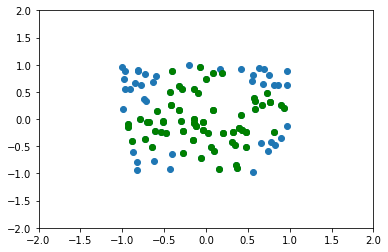

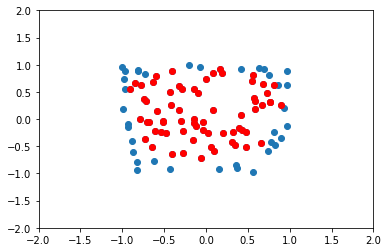

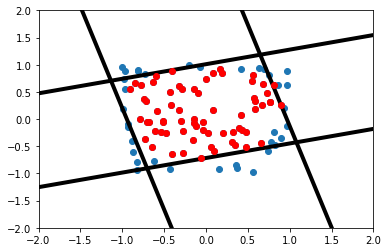

In [155]:
n = 103
eps = 15
#print(eps)
U_x = np.random.uniform(-1,1,(1,n))
U_y = np.random.uniform(-1,1,(1,n))
U = np.vstack((U_x,U_y))
thetas = [0.02, 90, 180, 270]
thetas = [thetas[i] + eps for i in range(4)]
directions = [[np.cos(np.radians(thetas[i])), np.sin(np.radians(thetas[i]))] for i in range(4)]
# colors = np.array([[np.dot(U[:,i], directions[j]) for i in range(n)] for j in range(4)])
# scales = [np.dot(U[:,np.argmax(colors[i])], directions[i]) for i in range(4)]
projections = [np.sort([np.dot(U[:,i], directions[j]) for i in range(n)]) for j in range(4)]
projections = [[projections[i][j]  for j in range(n) if projections[i][j] < np.quantile(projections[i],.95)] for i in range(4)]
scales = [projections[i][-1] for i in range(4)]

plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(U[0,:], U[1,:]);


test_theta = compute_fb_theta(U, .95, 2, eps)
plt.plot(test_theta[0,:], test_theta[1,:], "go")
plt.show()

############################
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(U[0,:], U[1,:]); 
test_fb = compute_fb(U, .95, 2)
plt.plot(test_fb[0,:], test_fb[1,:], "ro")
plt.show()

############################
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(U[0,:], U[1,:]);
supports = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], False) for i in range(4)])
#m_b = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], True) for i in range(4)])
for i in range(4):
    plt.plot(supports[i][0], supports[i][1], "k", linewidth=4)
test_fb = compute_fb(U, .95, 2)
plt.plot(test_fb[0,:], test_fb[1,:], "ro")
plt.show()



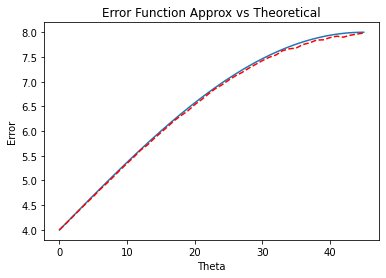

In [69]:
plt.plot([x for x in np.arange(0, 45, .01)], [8*np.sin(np.radians(90+x))*np.sin(np.radians(x))+4 for x in np.arange(0, 45, .01)])
plt.plot([x for x in np.arange(0, 46, 1)], error, 'r--')
plt.xlabel("Theta")
plt.ylabel("Error")
plt.title("Error Function Approx vs Theoretical")
plt.savefig("ErrorApprox.png")

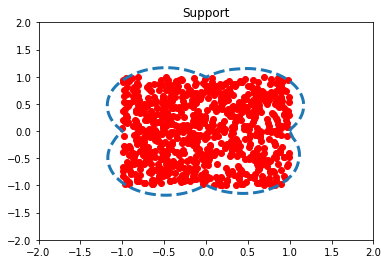

In [19]:
n = 800
U_x = np.random.uniform(-1,1,(1,n))
U_y = np.random.uniform(-1,1,(1,n))
U = np.vstack((U_x,U_y))
support_x = []
support_y = []
for theta in range(0, 361):
    direction = np.array([np.cos(np.radians(theta)), np.sin(np.radians(theta))])
    colors = [np.dot(U[:,i], direction) for i in range(n)]
    scale = np.dot(U[:,np.argmax(colors)], direction)
    support_x.append(direction[0]*scale)
    support_y.append(direction[1]*scale)
support = np.vstack((support_x, support_y))
plt.title(f"Support")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(U[0,:], U[1,:], c="red");
plt.plot(support[0,:], support[1,:], "--", linewidth=3)
plt.show()

[0.78503768 0.943309  ]


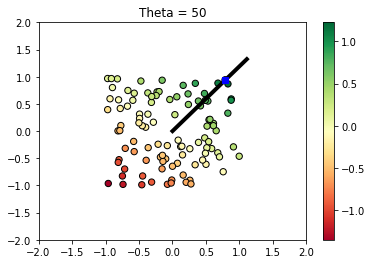

In [29]:
n = 103
U_x = np.random.uniform(-1,1,(1,n))
U_y = np.random.uniform(-1,1,(1,n))
U = np.vstack((U_x,U_y))
theta = 50
direction = np.array([np.cos(np.radians(theta)), np.sin(np.radians(theta))])
colors = [np.dot(U[:,i], direction) for i in range(n)]
scale = np.dot(U[:,np.argmax(colors)], direction)
print(U[:,np.argmax(colors)])
plt.title(f"Theta = {theta}")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(U[0,:], U[1,:], c=colors, cmap="RdYlGn", s=40, edgecolors="black");
plt.plot([0,direction[0]*(scale+.5)], [0, direction[1]*(scale+.5)], "k", linewidth=4)
plt.plot(direction[0]*scale, direction[1]*scale, "bs")
plt.colorbar()

    